In [0]:
import pandas as pd 

In [0]:

from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
path='/content/drive/My Drive/Kaggle'

In [0]:
!ls

drive  sample_data


In [0]:
import os 
train_dir = os.path.join(path, 'Training')
validation_dir = os.path.join(path, 'Validation')


train_men_dir = os.path.join(train_dir, 'men')


train_women_dir = os.path.join(train_dir, 'women')


validation_women_dir = os.path.join(validation_dir, 'Validation_women')


validation_men_dir = os.path.join(validation_dir, 'Validation_men')

In [0]:
train_woman_fnames = os.listdir(train_women_dir)
print(train_woman_fnames[:10])

train_man_fnames = os.listdir(train_men_dir)
train_man_fnames.sort()
print(train_man_fnames[:10])

['00001583.jpg', '00001334.jpg', '00001588.jpg', '00001742.jpg', '00001050.jpg', '00001691.jpg', '00002415.jpg', '00002128.jpg', '00001055.jpg', '00002209.jpg']
['000000899.jpg', '00000290.jpg', '00000292.png', '00000295.jpg', '00000297.jpg', '00000299.jpg', '00000303.jpg', '00000305.jpg', '00000306.jpg', '00000308.jpg']


In [0]:
print('total training woman images:', len(os.listdir(train_women_dir)))
print('total training man images:', len(os.listdir(train_men_dir)))
print('total validation woman images:', len(os.listdir(validation_women_dir)))
print('total validation man images:', len(os.listdir(validation_men_dir)))

total training woman images: 731
total training man images: 676
total validation woman images: 374
total validation man images: 289


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


nrows = 4
ncols = 4


pic_index = 0

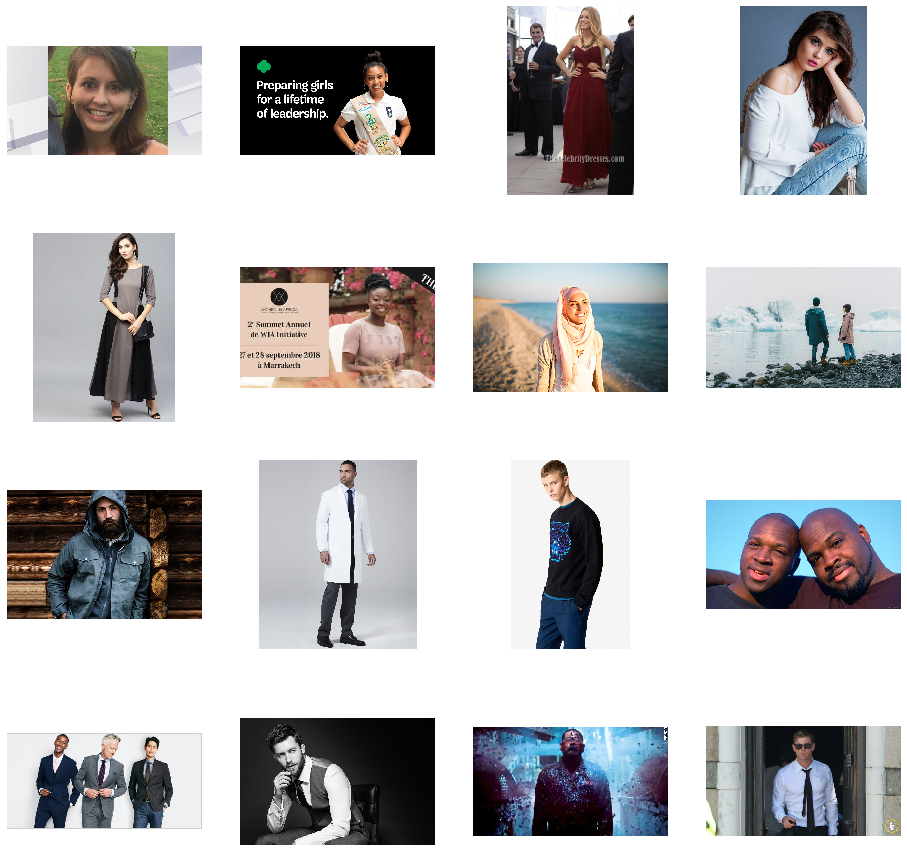

In [0]:

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_woman_pix = [os.path.join(train_women_dir, fname) 
                for fname in train_woman_fnames[pic_index-8:pic_index]]
next_man_pix = [os.path.join(train_men_dir, fname) 
                for fname in train_man_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_woman_pix+next_man_pix):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model


img_input = layers.Input(shape=(300, 300, 3))


x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
x = layers.Flatten()(x)


x = layers.Dense(512, activation='relu')(x)


output = layers.Dense(1, activation='sigmoid')(x)


model = Model(img_input, output)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0     

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(300, 300),  
        batch_size=18,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=33,
        class_mode='binary')

Found 1399 images belonging to 2 classes.
Found 662 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=78,  
      epochs=15,
      validation_data=validation_generator,
      validation_steps=20,  
      verbose=2)

Epoch 1/15
Epoch 1/15
78/78 - 866s - loss: 2.2527 - acc: 0.5425 - val_loss: 0.6748 - val_acc: 0.6242
Epoch 2/15
Epoch 1/15
78/78 - 41s - loss: 0.6595 - acc: 0.6405 - val_loss: 0.6639 - val_acc: 0.6000
Epoch 3/15
Epoch 1/15
78/78 - 40s - loss: 0.6274 - acc: 0.7255 - val_loss: 0.7209 - val_acc: 0.6015
Epoch 4/15
Epoch 1/15
78/78 - 40s - loss: 0.3982 - acc: 0.8170 - val_loss: 1.0130 - val_acc: 0.6091
Epoch 5/15
Epoch 1/15
78/78 - 40s - loss: 0.3066 - acc: 0.8771 - val_loss: 0.9846 - val_acc: 0.6091
Epoch 6/15
Epoch 1/15
78/78 - 41s - loss: 0.2291 - acc: 0.9357 - val_loss: 1.3726 - val_acc: 0.6091
Epoch 7/15
Epoch 1/15
78/78 - 41s - loss: 0.0739 - acc: 0.9786 - val_loss: 1.9398 - val_acc: 0.6015
Epoch 8/15
Epoch 1/15
78/78 - 41s - loss: 0.1524 - acc: 0.9685 - val_loss: 1.7438 - val_acc: 0.6258
Epoch 9/15
Epoch 1/15
78/78 - 40s - loss: 0.1535 - acc: 0.9757 - val_loss: 1.8245 - val_acc: 0.6409
Epoch 10/15
Epoch 1/15
78/78 - 39s - loss: 0.0973 - acc: 0.9828 - val_loss: 1.9412 - val_acc: 0.622

Text(0.5, 1.0, 'Training and validation loss')

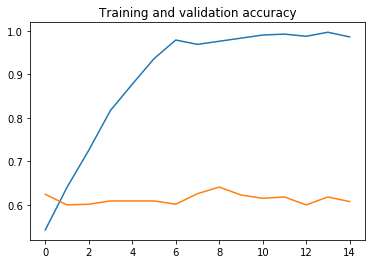

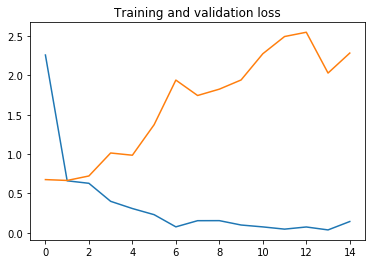

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Populating the interactive namespace from numpy and matplotlib


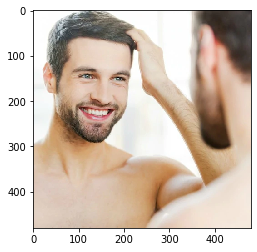

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('test1.jpg')
imgplot = plt.imshow(img)
plt.show()


In [0]:
from PIL import Image
import numpy as np 
img = Image.open('test1.jpg')
wpercent = (300/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img2 = img.resize((300,hsize), Image.ANTIALIAS)
x = np.asarray(img2)
x=x/255
y=np.expand_dims(x, axis=0)
print(y.shape)

(1, 300, 300, 3)


In [0]:
model.predict(y)

array([[0.25466073]], dtype=float32)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

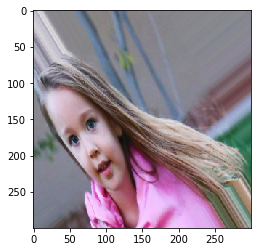

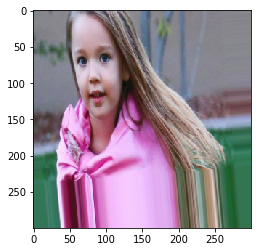

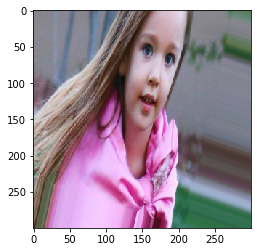

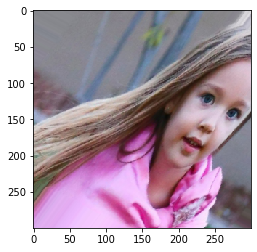

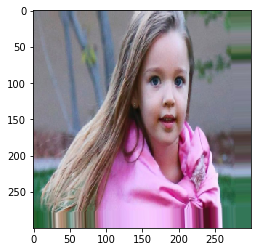

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_women_dir, train_woman_fnames[3])
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [0]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

#the validation data should not be augmented
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=18,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=33,
        class_mode='binary')

Found 1399 images belonging to 2 classes.
Found 662 images belonging to 2 classes.


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import ..

# Our input feature map is 300x300x3: 300x300 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(300, 300, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=78,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20,
      verbose=2)

Epoch 1/30
Epoch 1/30
78/78 - 930s - loss: 1.0983 - acc: 0.5504 - val_loss: 0.6802 - val_acc: 0.5606
Epoch 2/30
Epoch 1/30
78/78 - 65s - loss: 0.7056 - acc: 0.5797 - val_loss: 0.6552 - val_acc: 0.5682
Epoch 3/30
Epoch 1/30
78/78 - 65s - loss: 0.6836 - acc: 0.5876 - val_loss: 0.6565 - val_acc: 0.5727
Epoch 4/30
Epoch 1/30
78/78 - 65s - loss: 0.6934 - acc: 0.5718 - val_loss: 0.6628 - val_acc: 0.5773
Epoch 5/30
Epoch 1/30
78/78 - 66s - loss: 0.6767 - acc: 0.5961 - val_loss: 0.6540 - val_acc: 0.6136
Epoch 6/30
Epoch 1/30
78/78 - 65s - loss: 0.6961 - acc: 0.5947 - val_loss: 0.6908 - val_acc: 0.5773
Epoch 7/30
Epoch 1/30
78/78 - 65s - loss: 0.6617 - acc: 0.6147 - val_loss: 0.6705 - val_acc: 0.6106
Epoch 8/30
Epoch 1/30
78/78 - 66s - loss: 0.6667 - acc: 0.6054 - val_loss: 0.6407 - val_acc: 0.6545
Epoch 9/30
Epoch 1/30
78/78 - 64s - loss: 0.6604 - acc: 0.6247 - val_loss: 0.8056 - val_acc: 0.5924
Epoch 10/30
Epoch 1/30
78/78 - 65s - loss: 0.6521 - acc: 0.6326 - val_loss: 0.6596 - val_acc: 0.631

Text(0.5, 1.0, 'Training and validation loss')

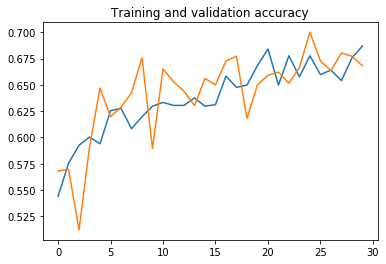

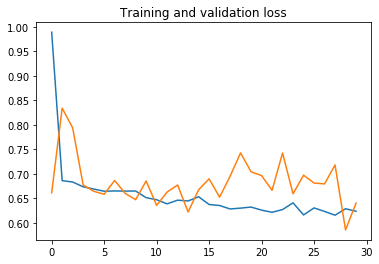

In [0]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


Populating the interactive namespace from numpy and matplotlib


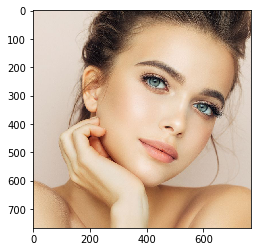

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('test2.jpg')
imgplot = plt.imshow(img)
plt.show()


In [0]:
from PIL import Image
import numpy as np 
img = Image.open('images.jpeg')
wpercent = (300/float(img.size[0]))
hsize = int((float(img.size[0])*float(wpercent)))
print(hsize)
img2 = img.resize((300,hsize), Image.ANTIALIAS)
x = np.asarray(img2)
x=x/255
y=np.expand_dims(x, axis=0)
print(y.shape)

300
(1, 300, 300, 3)


In [0]:
print(model.predict(y))

[[0.39793772]]


In [0]:
from keras.models import load_model
#save our model 
model.save('my_model.h5')

Using TensorFlow backend.
